## Brazilian Credit Risk Analysis.

In [433]:
import numpy as np
import pandas as pd

df = pd.read_csv("PAKDDdataset.csv", sep='\t', header = 0)

In [434]:
# This is a dataframe from a Brazilian retail chain from 2003 to 2008.
# it was initially made available in the Pacific-Asia competition on Knowledge Discovery and Data Mining,
# held in 2009 ~ http://sede.neurotech.com.br:443/PAKDD2009/

In [435]:
del df['Unnamed: 27']
df = df.dropna()

In [436]:
df.head()

,ID_SHOP,SEX,MARITAL_STATUS,AGE,FLAG_RESIDENCIAL_PHONE,AREA_CODE_RESIDENCIAL_PHONE,PAYMENT_DAY,SHOP_RANK,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,...,FLAG_RESIDENCIAL_ADDRESS_eq_POSTAL_ADDRESS,FLAG_OTHER_CARD,QUANT_BANKING_ACCOUNTS,FLAG_MOBILE_PHONE,FLAG_CONTACT_PHONE,PERSONAL_NET_INCOME,COD_APPLICATION_BOOTH,QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION,FLAG_CARD_INSURANCE_OPTION,TARGET_LABEL_BAD=1
0,22,F,O,44,N,31,12,0,P,12,...,Y,N,0,N,N,300,0,0,N,0
1,15,F,S,18,Y,31,20,0,P,216,...,Y,N,0,N,N,300,0,0,N,0
2,24,F,C,22,Y,31,8,0,P,48,...,Y,N,0,N,N,229,0,0,N,0
3,12,F,C,47,N,31,25,0,P,180,...,Y,N,0,N,N,304,0,0,N,0
4,16,F,S,28,Y,31,25,0,O,12,...,Y,N,0,N,N,250,0,0,N,0


In [437]:
df.columns

Index(['ID_SHOP', 'SEX', 'MARITAL_STATUS', 'AGE', 'FLAG_RESIDENCIAL_PHONE',
       'AREA_CODE_RESIDENCIAL_PHONE', 'PAYMENT_DAY', 'SHOP_RANK',
       'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'FLAG_MOTHERS_NAME',
       'FLAG_FATHERS_NAME', 'FLAG_RESIDENCE_TOWN_eq_WORKING_TOWN',
       'FLAG_RESIDENCE_STATE_eq_WORKING_STATE', 'MONTHS_IN_THE_JOB',
       'PROFESSION_CODE', 'MATE_INCOME',
       'FLAG_RESIDENCIAL_ADDRESS_eq_POSTAL_ADDRESS', 'FLAG_OTHER_CARD',
       'QUANT_BANKING_ACCOUNTS', 'FLAG_MOBILE_PHONE', 'FLAG_CONTACT_PHONE',
       'PERSONAL_NET_INCOME', 'COD_APPLICATION_BOOTH',
       'QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION',
       'FLAG_CARD_INSURANCE_OPTION', 'TARGET_LABEL_BAD=1'],
      dtype='object')

### Checking classes

In [438]:
for c in df.columns:
    if df[c].dtype == object:
        print(c,'------' ,df[c].unique())

SEX ------ ['F' 'M']
MARITAL_STATUS ------ ['O' 'S' 'C' 'V' 'D']
FLAG_RESIDENCIAL_PHONE ------ ['N' 'Y']
RESIDENCE_TYPE ------ ['P' 'O' 'A' 'C']
FLAG_MOTHERS_NAME ------ ['Y' 'N']
FLAG_FATHERS_NAME ------ ['Y' 'N']
FLAG_RESIDENCE_TOWN_eq_WORKING_TOWN ------ ['N' 'Y']
FLAG_RESIDENCE_STATE_eq_WORKING_STATE ------ ['Y' 'N']
FLAG_RESIDENCIAL_ADDRESS_eq_POSTAL_ADDRESS ------ ['Y' 'N']
FLAG_OTHER_CARD ------ ['N']
FLAG_MOBILE_PHONE ------ ['N' 'JOANA' 'VALERIA MACHADO' 'SEBASTIANA' 'EDNA' 'LCE TAMEGA'
 'ANNA CANDIDA ( MAE )' 'MARLENE' 'IRISMAR' 'CRISPIANO' 'ODETE DOS SANTOS']
FLAG_CONTACT_PHONE ------ ['N']
PERSONAL_NET_INCOME ------ ['300' '229' '304' ... '5184' '758.1' '3015']
FLAG_CARD_INSURANCE_OPTION ------ ['N' '0' '2']
TARGET_LABEL_BAD=1 ------ ['0' '1' 'N']


In [439]:
# Removing useless features

del df['ID_SHOP']
del df['COD_APPLICATION_BOOTH']
del df['SHOP_RANK']
del df['AREA_CODE_RESIDENCIAL_PHONE']
del df['FLAG_OTHER_CARD']
del df['FLAG_CONTACT_PHONE']
del df['FLAG_MOBILE_PHONE']
del df['QUANT_BANKING_ACCOUNTS']
del df['FLAG_CARD_INSURANCE_OPTION']

df_filtered = df["TARGET_LABEL_BAD=1"] != 'N'
df_filtered = df[df_filtered]

In [440]:
for c in df.columns:
    if df_filtered[c].dtype == object:
        print(c,'------' ,df_filtered[c].unique())

SEX ------ ['F' 'M']
MARITAL_STATUS ------ ['O' 'S' 'C' 'V' 'D']
FLAG_RESIDENCIAL_PHONE ------ ['N' 'Y']
RESIDENCE_TYPE ------ ['P' 'O' 'A' 'C']
FLAG_MOTHERS_NAME ------ ['Y' 'N']
FLAG_FATHERS_NAME ------ ['Y' 'N']
FLAG_RESIDENCE_TOWN_eq_WORKING_TOWN ------ ['N' 'Y']
FLAG_RESIDENCE_STATE_eq_WORKING_STATE ------ ['Y' 'N']
FLAG_RESIDENCIAL_ADDRESS_eq_POSTAL_ADDRESS ------ ['Y' 'N']
PERSONAL_NET_INCOME ------ ['300' '229' '304' ... '5184' '758.1' '3015']
TARGET_LABEL_BAD=1 ------ ['0' '1']


### Encoding features

In [441]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

credit_encoder = LabelEncoder()

df_filtered['SEX'] = credit_encoder.fit_transform(df_filtered['SEX'])
df_filtered['MARITAL_STATUS'] = credit_encoder.fit_transform(df_filtered['MARITAL_STATUS'])
df_filtered['FLAG_RESIDENCIAL_PHONE'] = credit_encoder.fit_transform(df_filtered['FLAG_RESIDENCIAL_PHONE'])
df_filtered['RESIDENCE_TYPE'] = credit_encoder.fit_transform(df_filtered['RESIDENCE_TYPE'])
df_filtered['FLAG_MOTHERS_NAME'] = credit_encoder.fit_transform(df_filtered['FLAG_MOTHERS_NAME'])
df_filtered['FLAG_FATHERS_NAME'] = credit_encoder.fit_transform(df_filtered['FLAG_FATHERS_NAME'])
df_filtered['FLAG_RESIDENCE_TOWN_eq_WORKING_TOWN'] = credit_encoder.fit_transform(df_filtered['FLAG_RESIDENCE_TOWN_eq_WORKING_TOWN'])
df_filtered['FLAG_RESIDENCE_STATE_eq_WORKING_STATE'] = credit_encoder.fit_transform(df_filtered['FLAG_RESIDENCE_STATE_eq_WORKING_STATE'])
df_filtered['FLAG_RESIDENCIAL_ADDRESS_eq_POSTAL_ADDRESS'] = credit_encoder.fit_transform(df_filtered['FLAG_RESIDENCIAL_ADDRESS_eq_POSTAL_ADDRESS'])

print("Encoding complete.")

Encoding complete.


In [442]:
for c in df.columns:
    if df_filtered[c].dtype == object:
        print(c,'------' ,df_filtered[c].unique())

PERSONAL_NET_INCOME ------ ['300' '229' '304' ... '5184' '758.1' '3015']
TARGET_LABEL_BAD=1 ------ ['0' '1']


In [443]:
# Defing type of features

df_filtered['PERSONAL_NET_INCOME'] = df_filtered['PERSONAL_NET_INCOME'].astype(float)
df_filtered['TARGET_LABEL_BAD=1'] = df_filtered['TARGET_LABEL_BAD=1'].astype(int)
print("done.")

done.


In [444]:
df_filtered.head()

,SEX,MARITAL_STATUS,AGE,FLAG_RESIDENCIAL_PHONE,PAYMENT_DAY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOTHERS_NAME,FLAG_FATHERS_NAME,FLAG_RESIDENCE_TOWN_eq_WORKING_TOWN,FLAG_RESIDENCE_STATE_eq_WORKING_STATE,MONTHS_IN_THE_JOB,PROFESSION_CODE,MATE_INCOME,FLAG_RESIDENCIAL_ADDRESS_eq_POSTAL_ADDRESS,PERSONAL_NET_INCOME,QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION,TARGET_LABEL_BAD=1
0,0,2,44,0,12,3,12,1,1,0,1,48,731,0.0,1,300.0,0,0
1,0,3,18,1,20,3,216,1,1,1,1,12,853,0.0,1,300.0,0,0
2,0,0,22,1,8,3,48,1,0,1,1,12,40,0.0,1,229.0,0,0
3,0,0,47,0,25,3,180,1,1,0,1,24,35,0.0,1,304.0,0,0
4,0,3,28,1,25,2,12,1,1,1,1,12,24,0.0,1,250.0,0,0


In [445]:
df_filtered.columns

Index(['SEX', 'MARITAL_STATUS', 'AGE', 'FLAG_RESIDENCIAL_PHONE', 'PAYMENT_DAY',
       'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'FLAG_MOTHERS_NAME',
       'FLAG_FATHERS_NAME', 'FLAG_RESIDENCE_TOWN_eq_WORKING_TOWN',
       'FLAG_RESIDENCE_STATE_eq_WORKING_STATE', 'MONTHS_IN_THE_JOB',
       'PROFESSION_CODE', 'MATE_INCOME',
       'FLAG_RESIDENCIAL_ADDRESS_eq_POSTAL_ADDRESS', 'PERSONAL_NET_INCOME',
       'QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION', 'TARGET_LABEL_BAD=1'],
      dtype='object')

In [446]:
# Renaming feature columns

columns = ['Sex', 'Marital Status', 'Age', 'Has Residencial Phone', 'Payment Day',
           'Residence Type', 'Months in Residence', 'Mothers Name Added', 'Fathers Name Added',
           'Works in the same City where Lives', 'Works in the same State where Lives', 'Months in the Job',
           'Profession Code', 'Mate Income', 'Rerieve Postal where Lives', 'Personal Net Income',
           'Additional Cards', 'Target']

df_filtered.columns = columns

In [447]:
df_filtered.head()

,Sex,Marital Status,Age,Has Residencial Phone,Payment Day,Residence Type,Months in Residence,Mothers Name Added,Fathers Name Added,Works in the same City where Lives,Works in the same State where Lives,Months in the Job,Profession Code,Mate Income,Rerieve Postal where Lives,Personal Net Income,Additional Cards,Target
0,0,2,44,0,12,3,12,1,1,0,1,48,731,0.0,1,300.0,0,0
1,0,3,18,1,20,3,216,1,1,1,1,12,853,0.0,1,300.0,0,0
2,0,0,22,1,8,3,48,1,0,1,1,12,40,0.0,1,229.0,0,0
3,0,0,47,0,25,3,180,1,1,0,1,24,35,0.0,1,304.0,0,0
4,0,3,28,1,25,2,12,1,1,1,1,12,24,0.0,1,250.0,0,0


## Interpretable Methods.

In [448]:
# Classes

print(df_filtered.groupby(['Target']).size())

X = df_filtered.drop(columns = ['Target'])
Y = df_filtered['Target']

Target
0    32070
1     7917
dtype: int64


In [449]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

### Random Forest Classifier as an Interpretable Model

In [450]:
from sklearn.tree import DecisionTreeClassifier 

clf_dt = DecisionTreeClassifier(max_depth=2, random_state=123, class_weight='balanced')

clf_dt.fit(X_train, y_train);

In [451]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, clf_dt.predict_proba(X_test)[:,1])

0.6274709034971238

In [452]:
from sklearn import tree, ensemble
import copy

text_representation = tree.export_text(clf_dt, feature_names=list(X.columns))
print(text_representation)

|--- Age <= 32.50
|   |--- Has Residencial Phone <= 0.50
|   |   |--- class: 1
|   |--- Has Residencial Phone >  0.50
|   |   |--- class: 1
|--- Age >  32.50
|   |--- Has Residencial Phone <= 0.50
|   |   |--- class: 1
|   |--- Has Residencial Phone >  0.50
|   |   |--- class: 0



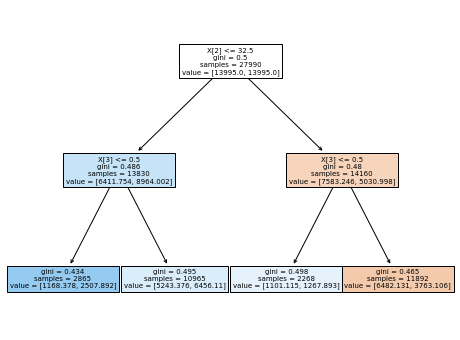

In [453]:
import matplotlib.pyplot as plt

plt.figure(figsize = [8,6])
tree.plot_tree(clf_dt,filled=True)
plt.show()

### Logistic Regression Classifier as an Interpretable Model

In [454]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(class_weight=None, max_iter=10**3)

clf_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [455]:
pd.DataFrame(clf_log.coef_.T, columns=['Feature Importance'], index=list(X.columns))

,Feature Importance
Sex,-5.354533e-05
Marital Status,-9.621184e-04
Age,-3.260137e-02
Has Residencial Phone,-9.426889e-04
Payment Day,-9.837202e-03
Residence Type,-1.762295e-03
Months in Residence,-4.247086e-04
Mothers Name Added,-8.024156e-04
Fathers Name Added,-8.073892e-04
Works in the same City where Lives,-5.853719e-04


### Random Forest Classifier as a Complex Classifier

In [456]:
from sklearn import tree, ensemble
import copy

clf_rt = ensemble.RandomForestClassifier(n_estimators=5, max_depth=5, max_leaf_nodes=70, class_weight='balanced')

clf_rt.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=70,
                       n_estimators=5)

In [457]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, clf_rt.predict_proba(X_test)[:,1])

0.6617169819173373

#### Global Method - Partial Dependence Plot (PDP)

In [458]:
X_test_pdp = X_test.copy()

In [459]:
X_test_pdp.head()

,Sex,Marital Status,Age,Has Residencial Phone,Payment Day,Residence Type,Months in Residence,Mothers Name Added,Fathers Name Added,Works in the same City where Lives,Works in the same State where Lives,Months in the Job,Profession Code,Mate Income,Rerieve Postal where Lives,Personal Net Income,Additional Cards
16266,0,0,41,1,18,0,24,1,1,1,1,120,1,2000.0,1,600.0,0
16534,0,4,48,1,8,0,240,1,1,0,1,12,704,0.0,1,1210.0,1
22781,0,0,38,1,12,3,48,1,1,1,1,12,123,0.0,1,181.0,0
14547,0,0,35,1,12,3,180,1,1,0,1,0,35,0.0,1,450.0,0
35305,0,3,20,1,1,3,240,1,1,0,1,12,43,0.0,1,500.0,0


In [460]:
# AGE

X_test_pdp = X_test.copy()

# Choosing the Feature 
single_list = np.unique(X_test_pdp['Age'])
print(single_list)

predited_mean = []

for i in single_list:
    
    X_test_pdp['Age'] = i
            
    Y_pred = clf_rt.predict_proba(X_test_pdp)
            
    predited_mean.append(Y_pred[:, 1].mean())
    
print(predited_mean)

[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 86]
[0.5685974200936802, 0.5685974200936802, 0.5685974200936802, 0.5685974200936802, 0.559964962536173, 0.5575305113820577, 0.5575305113820577, 0.5438511225382754, 0.5438511225382754, 0.5300105887136937, 0.5300105887136937, 0.5300105887136937, 0.5300105887136937, 0.5129347275037017, 0.5129347275037017, 0.512621338573183, 0.5023376666040841, 0.48869211243546395, 0.477315541491006, 0.46646352655391216, 0.46646352655391216, 0.46020642735607586, 0.4422636823902636, 0.4422636823902636, 0.42751904787693434, 0.42751904787693434, 0.42751904787693434, 0.42523985021062033, 0.42523985021062033, 0.42523985021062033, 0.42523985021062033, 0.41874151426641465, 0.41094211599953134, 0.41094211599953134, 0.41094211599953134, 0.41094211599953134, 0.41094211599953134, 0.41094211599953134, 0.40967773

[Text(0, 0.5, 'Partial Dependence'), Text(0.5, 0, 'Age')]

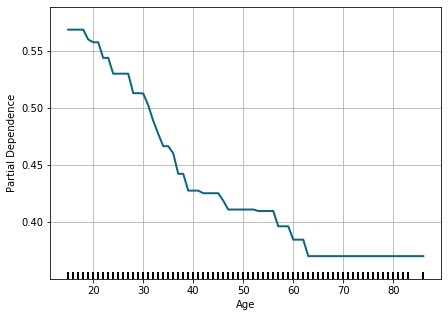

In [470]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x_axis = single_list
y_axis = predited_mean

fig, ax = plt.subplots(figsize=(7, 5))

fig = sns.lineplot(x=single_list, y=predited_mean, linewidth = 2, color = '#086788')
sns.rugplot(x=single_list, color = 'k', linewidth = 2)

#plt.xticks([0, 200000, 400000, 600000, 800000])
#plt.xlim(-50000, 850000)
#plt.yticks([0.14, 0.16, 0.18, 0.20, 0.22, 0.24, 0.26])
#plt.yticks([0.05, 0.1, 0.15, 0.20, 0.25, 0.30])

#plt.yticks([0.35, 0.4, 0.45, 0.5, 0.55])
#plt.ylim(0.3, 0.6)

plt.grid()

fig.set(xlabel = "Age", ylabel = "Partial Dependence")

In [471]:
# MARITAL STATUS

X_test_pdp = X_test.copy()

# Choosing the Feature
single_list = np.unique(X_test_pdp['Marital Status'])
print(single_list)

predited_mean = []

for i in single_list:
    
    X_test_pdp['Marital Status'] = i
            
    Y_pred = clf_rt.predict_proba(X_test_pdp)
            
    predited_mean.append(Y_pred[:, 1].mean())
    
print(predited_mean)

[0 1 2 3 4]
[0.44451211696593057, 0.45242376064113876, 0.5089755101320782, 0.4970892504364133, 0.4970892504364133]


In [472]:
df_filtered['Marital Status'].unique()

array([2, 3, 0, 4, 1])

[Text(0, 0.5, 'Partial Dependence'), Text(0.5, 0, 'Marital Status')]

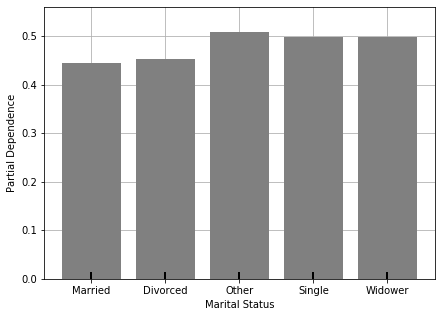

In [473]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x_axis = single_list
y_axis = predited_mean

fig = plt.subplots(figsize=(7, 5))

fig = sns.barplot(x=single_list, y=predited_mean, linewidth = 2, color = 'gray', zorder=2)
sns.rugplot(x=single_list, color = 'k', linewidth = 2, zorder=3)

fig.set_xticks([2, 3, 0, 4, 1])
fig.set_xticklabels(['Other', 'Single', 'Married', 'Widower', 'Divorced'], minor=False, rotation=0)

fig.grid(True)

#plt.yticks([0.416, 0.417, 0.418, 0.419, 0.42])
#plt.ylim(0.4149, 0.42115)

fig.set(xlabel = "Marital Status", ylabel = "Partial Dependence")

In [474]:
# PAYMENT DAY

X_test_pdp = X_test.copy()

# Choosing the Feature
single_list = np.unique(X_test_pdp['Payment Day'])
print(single_list)

predited_mean = []

for i in single_list:
    
    X_test_pdp['Payment Day'] = i
            
    Y_pred = clf_rt.predict_proba(X_test_pdp)
            
    predited_mean.append(Y_pred[:, 1].mean())
    
print(predited_mean)

[ 1  3  6  8  9 11 12 15 16 18 20 22 23 25 27 28]
[0.4730595894205673, 0.47203306121693855, 0.47203306121693855, 0.47203306121693855, 0.47203306121693855, 0.47223656049521523, 0.47223656049521523, 0.47223656049521523, 0.47223656049521523, 0.47223656049521523, 0.47232769085906984, 0.47232769085906984, 0.4759053734753772, 0.4952247005104765, 0.49662298289143064, 0.4997138356831996]


[Text(0, 0.5, 'Partial Dependence'), Text(0.5, 0, 'Payment Day')]

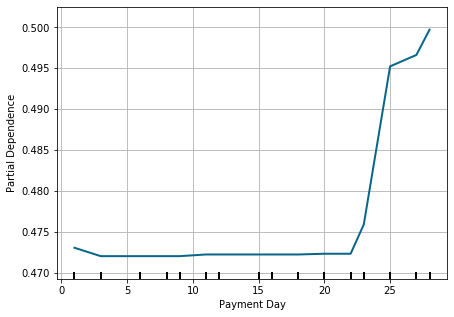

In [475]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x_axis = single_list
y_axis = predited_mean

fig, ax = plt.subplots(figsize=(7, 5))

fig = sns.lineplot(x=single_list, y=predited_mean, linewidth = 2, color = '#086788')
sns.rugplot(x=single_list, color = 'k', linewidth = 2)

#plt.xticks([0, 200000, 400000, 600000, 800000])
#plt.xlim(-50000, 850000)
#plt.yticks([0.14, 0.16, 0.18, 0.20, 0.22, 0.24, 0.26])
#plt.yticks([0.05, 0.1, 0.15, 0.20, 0.25, 0.30])

#plt.yticks([0.35, 0.4, 0.45, 0.5, 0.55])
#plt.ylim(0.3, 0.6)

plt.grid()

fig.set(xlabel = "Payment Day", ylabel = "Partial Dependence")

In [476]:
# MONTHS IN THE JOB

X_test_pdp = X_test.copy()

# Choosing the Feature
single_list = np.unique(X_test_pdp['Months in the Job'])
print(single_list)

predited_mean = []

for i in single_list:
    
    X_test_pdp['Months in the Job'] = i
            
    Y_pred = clf_rt.predict_proba(X_test_pdp)
            
    predited_mean.append(Y_pred[:, 1].mean())
    
print(predited_mean)

[  0  12  24  36  48  60  72  84  96 108 120 132 144 156 168 180 192 204
 216 228 240 252 264 276 288 300 312 324 336 348 360 372 384 396 408 420
 432 444 456 480 492 504 516 588 600 660 684 708]
[0.5008743959940484, 0.4990828625111426, 0.4895500828334376, 0.4672016061652176, 0.4481258959783955, 0.4481258959783955, 0.4481258959783955, 0.4494847717311025, 0.4487143203793452, 0.44113702274349725, 0.44113702274349725, 0.43435074816303165, 0.43435074816303165, 0.43435074816303165, 0.43435074816303165, 0.4364927182310677, 0.4364927182310677, 0.4364927182310677, 0.4364927182310677, 0.4364927182310677, 0.4371453078320954, 0.4371453078320954, 0.4371453078320954, 0.4371453078320954, 0.4371453078320954, 0.4371453078320954, 0.4371453078320954, 0.4371453078320954, 0.4371453078320954, 0.4371453078320954, 0.439328533420063, 0.439328533420063, 0.439328533420063, 0.439328533420063, 0.439328533420063, 0.439328533420063, 0.439328533420063, 0.439328533420063, 0.439328533420063, 0.439328533420063, 0.43932

[Text(0.5, 0, 'Months in the Job')]

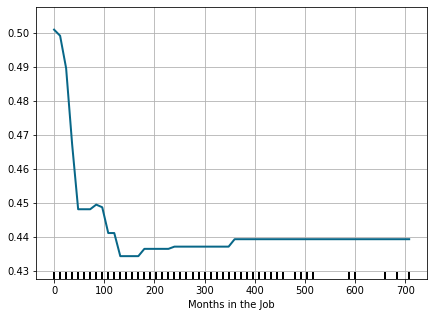

In [477]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x_axis = single_list
y_axis = predited_mean

fig, ax = plt.subplots(figsize=(7, 5))

fig = sns.lineplot(x=single_list, y=predited_mean, linewidth = 2, color = '#086788')
sns.rugplot(x=single_list, color = 'k', linewidth = 2)

#plt.xticks([0, 200000, 400000, 600000, 800000])
#plt.xlim(-50000, 850000)
#plt.yticks([0.14, 0.16, 0.18, 0.20, 0.22, 0.24, 0.26])
#plt.yticks([0.05, 0.1, 0.15, 0.20, 0.25, 0.30])

#plt.yticks([0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49])
#plt.ylim(0.4, 0.5)

plt.grid()

fig.set(xlabel = "Months in the Job")

In [478]:
# MATE INCOME

X_test_pdp = X_test.copy()

# Choosing the Feature
single_list = np.unique(X_test_pdp['Mate Income'])
print(single_list)

predited_mean = []

for i in single_list:
    
    X_test_pdp['Mate Income'] = i
            
    Y_pred = clf_rt.predict_proba(X_test_pdp)
            
    predited_mean.append(Y_pred[:, 1].mean())
    
print(predited_mean)

[     0.      180.      200.      201.      209.      215.      220.
    224.      230.      233.      236.      238.      240.      250.
    260.      270.      283.      290.      300.      312.      315.
    320.      323.      326.33    330.      343.      347.      350.
    360.      364.      370.      380.      390.      395.      400.
    415.      420.      421.      428.      433.      434.      440.
    450.      460.      462.      465.      480.      481.      485.
    486.      490.      498.      500.      502.      505.      508.
    510.      518.      534.      535.      540.      543.      550.
    554.      556.      557.      560.      562.      568.      570.
    578.      580.      594.      596.      600.      619.      636.
    646.      650.      655.      659.      676.      680.      698.
    700.      703.      712.      715.      720.      722.      746.
    750.      755.      765.      769.      779.      781.      797.
    798.      800.      826.      

[Text(0.5, 0, 'Mate Income')]

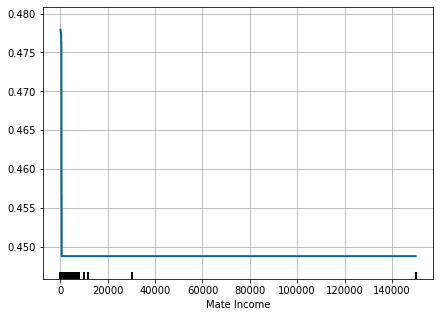

In [479]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x_axis = single_list
y_axis = predited_mean

fig, ax = plt.subplots(figsize=(7, 5))

fig = sns.lineplot(x=single_list, y=predited_mean, linewidth = 2, color = '#086788')
sns.rugplot(x=single_list, color = 'k', linewidth = 2)

#plt.xticks([0, 200000, 400000, 600000, 800000])
#plt.xlim(-50000, 850000)
#plt.yticks([0.14, 0.16, 0.18, 0.20, 0.22, 0.24, 0.26])
#plt.yticks([0.05, 0.1, 0.15, 0.20, 0.25, 0.30])

#plt.yticks([0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49])
#plt.ylim(0.4, 0.5)

plt.grid()

fig.set(xlabel = "Mate Income")

#### Global Method -  Accumulated Local Effects (ALE)

In [480]:
X_test_ale = X_test.copy()

In [481]:
X_test_ale.head()

,Sex,Marital Status,Age,Has Residencial Phone,Payment Day,Residence Type,Months in Residence,Mothers Name Added,Fathers Name Added,Works in the same City where Lives,Works in the same State where Lives,Months in the Job,Profession Code,Mate Income,Rerieve Postal where Lives,Personal Net Income,Additional Cards
16266,0,0,41,1,18,0,24,1,1,1,1,120,1,2000.0,1,600.0,0
16534,0,4,48,1,8,0,240,1,1,0,1,12,704,0.0,1,1210.0,1
22781,0,0,38,1,12,3,48,1,1,1,1,12,123,0.0,1,181.0,0
14547,0,0,35,1,12,3,180,1,1,0,1,0,35,0.0,1,450.0,0
35305,0,3,20,1,1,3,240,1,1,0,1,12,43,0.0,1,500.0,0


In [482]:
# Defining Quantiles

values = X_test["Age"].unique()
print(np.sort(values))

bins = 10 # Number of bins used to split feature's space. 

quantiles = np.unique(np.quantile(X_test["Age"], np.linspace(0, 1, bins + 1), interpolation="lower"))
# Compute the q-th quantile of the data along the specified axis.

print(quantiles)

[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 86]
[15 20 22 25 28 33 36 40 45 53 86]


In [483]:
# Defining Points Between Bins 

values = X_test["Age"]
print(values)

indices = np.clip(np.digitize(X_test["Age"], quantiles, right=True) - 1, 0, None)
# Return the indices of the bins to which each value in input array belongs.
# Clip (limit) the values in an array.

print(len(indices))
print(indices)
print(np.unique(indices))

16266    41
16534    48
22781    38
14547    35
35305    20
         ..
11620    51
28573    71
607      42
5422     37
32312    24
Name: Age, Length: 11997, dtype: int64
11997
[7 8 6 ... 7 6 2]
[0 1 2 3 4 5 6 7 8 9]


In [484]:
# Predicting Near Values

predictions = []

for offset in range(2):
    mod_train_set = X_test.copy()
    mod_train_set["Age"] = quantiles[indices + offset] 
    print(mod_train_set["Age"])
    Y_pred = clf_rt.predict_proba(mod_train_set)
    predictions.append(Y_pred[:, 0]) # esse offset tá estranho
    
        
print(predictions)

16266    40
16534    45
22781    36
14547    33
35305    15
         ..
11620    45
28573    53
607      40
5422     36
32312    22
Name: Age, Length: 11997, dtype: int64
16266    45
16534    53
22781    40
14547    36
35305    20
         ..
11620    53
28573    86
607      45
5422     40
32312    25
Name: Age, Length: 11997, dtype: int64
[array([0.81062485, 0.56909795, 0.64938683, ..., 0.59757541, 0.36066393,
       0.46562033]), array([0.81062485, 0.63979459, 0.67194951, ..., 0.59757541, 0.42269207,
       0.49402652])]


In [485]:
# Checking the indifvidual effects
effects = predictions[1] - predictions[0]

print(effects)

[0.         0.07069664 0.02256268 ... 0.         0.06202814 0.02840619]


In [486]:
# Average these differences within each bin
index_groupby = pd.DataFrame({"index": indices, "effects": effects}).groupby("index")
print(np.unique(indices))

index_groupby.head()

[0 1 2 3 4 5 6 7 8 9]


,index,effects
0,7,0.000000
1,8,0.070697
2,6,0.022563
3,5,0.000000
4,0,0.023101
5,7,0.000000
6,2,0.028406
7,8,0.030071
8,7,0.021342
9,8,0.006598


In [487]:
mean_effects = index_groupby.mean().to_numpy().flatten()
print(mean_effects)

[0.01890448 0.0071999  0.00661668 0.01620482 0.03624637 0.02191889
 0.02686487 0.0033889  0.01888558 0.02906325]


In [488]:
# Sum of cumulative effects

np.cumsum(mean_effects)

array([0.01890448, 0.02610439, 0.03272107, 0.04892589, 0.08517225,
       0.10709114, 0.13395601, 0.13734491, 0.15623049, 0.18529374])

In [489]:
# ALE Plots

# Add 0 to make it grow to 11
ale = np.array([0, *np.cumsum(mean_effects)])

print(ale)

# Centering the Accumulated Local Effects
ale = (ale[1:] + ale[:-1]) / 2

print(ale)

[0.         0.01890448 0.02610439 0.03272107 0.04892589 0.08517225
 0.10709114 0.13395601 0.13734491 0.15623049 0.18529374]
[0.00945224 0.02250443 0.02941273 0.04082348 0.06704907 0.0961317
 0.12052358 0.13565046 0.1467877  0.17076212]


In [490]:
print(index_groupby.size())

index
0    1620
1    1047
2    1202
3     933
4    1478
5     926
6    1193
7    1208
8    1240
9    1150
dtype: int64


In [491]:
print(X_test.shape[0])

11997


In [492]:
ale -= np.sum(ale * index_groupby.size() / X_test.shape[0])
print(ale)

[-0.07277475 -0.05972256 -0.05281426 -0.04140351 -0.01517792  0.01390471
  0.03829659  0.05342347  0.06456071  0.08853512]


In [493]:
print(quantiles)
print(len(quantiles))

print((quantiles[1:] + quantiles[:-1]) / 2)
print(len((quantiles[1:] + quantiles[:-1]) / 2))

[15 20 22 25 28 33 36 40 45 53 86]
11
[17.5 21.  23.5 26.5 30.5 34.5 38.  42.5 49.  69.5]
10


Text(0, 0.5, 'Accumulated Local Effects')

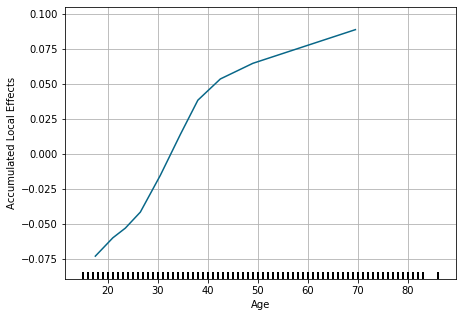

In [494]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 5))

single_list = np.unique(X_test['Age'])

plt.plot((quantiles[1:] + quantiles[:-1]) / 2, ale, color = '#086788')
sns.rugplot(x=single_list, color = 'k', linewidth = 2)

plt.grid()
#plt.ylim([0, 1])
plt.xlabel("Age")
plt.ylabel("Accumulated Local Effects")

#### Local Method -  Local Surrogate (LIME)

In [495]:
#!pip install lime

In [496]:
import lime
from lime import lime_tabular

In [497]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=columns,
    class_names=[0, 1],
    discretize_continuous=False,
)

In [498]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[34], 
    predict_fn=clf_rt.predict_proba
)

exp.show_in_notebook(show_table=True)

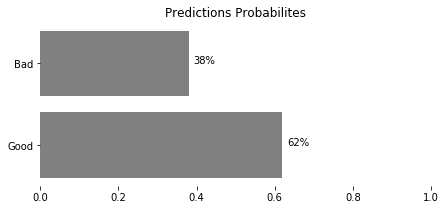

In [499]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

classes = ['Bad', 'Good']
predictions = [0.38, 0.62]

fig = plt.subplots(figsize=(7, 3))

fig = sns.barplot(x=predictions, y=classes, color = 'gray', orient = 'h').set(title='Predictions Probabilites')

plt.text(0.62+0.04, 1, s='62%', ha="center", color='black')
plt.text(0.38+0.04, 0, s='38%', ha="center", color='black')

plt.xlim(0, 1)
sns.despine(left=True, bottom=True)

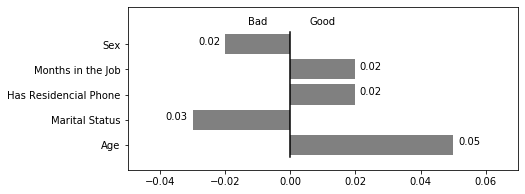

In [503]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

classes = ['Age', 'Marital Status', 'Has Residencial Phone', 'Months in the Job', 'Sex']
explanation = [0.05, -0.03, 0.02, 0.02, -0.02]

fig = plt.subplots(figsize=(7, 3))

fig = sns.barplot(x=explanation, y=classes, color = 'gray', orient = 'h', zorder=2)

plt.text(0.05+0.005, 0, s='0.05', ha="center", color='black')
plt.text(-0.03-0.005, 1, s='0.03', ha="center", color='black')
plt.text(0.02+0.0045, 2, s='0.02', ha="center", color='black')
plt.text(0.02+0.0045, 3, s='0.02', ha="center", color='black')
plt.text(-0.02-0.005, 4, s='0.02', ha="center", color='black')

plt.text(-0.01, 4.8, s='Bad', ha="center", color='black')
plt.text(0.01, 4.8, s='Good', ha="center", color='black')

plt.ylim(-1, 5.5)
plt.xlim(-0.05, 0.07)


plt.plot([0, 0], [-0.5, 4.5], color='black')

#### Local Method - Counterfactual Explanations

In [504]:
# !pip install -q git+https://github.com/visual-ds/cfmining.git
# !pip install xxhash

In [505]:
import time
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

from cfmining.algorithms import MAPOCAM, BruteForce, Greedy
from cfmining.criteria import PercentileCalculator, PercentileCriterion, PercentileChangesCriterion, NonDomCriterion
from cfmining.predictors import MonotoneClassifier
from cfmining.visualization import buildTable, PlotCounterfactuals
from cfmining.mip_builder import RecourseBuilder
from cfmining.action_set import ActionSet

In [506]:
# !pip show cfmining

##### Logistic Regression Explanation.

In [507]:
## grid search
clf_logreg = LogisticRegression(max_iter=1000, solver='lbfgs') # class_weight='balanced'
grid = GridSearchCV(
  clf_logreg, param_grid={'C': np.logspace(-12, 12, num=25)},
  cv=5,
  scoring='roc_auc',
)
grid.fit(X_train, y_train)
clf_logreg = grid.best_estimator_

In [508]:
print('AUC performance:', roc_auc_score(y_test, clf_logreg.predict_proba(X_test)[:,1]))

AUC performance: 0.6310037725468519


In [509]:
prob = 0.3
clf_logreg_ = MonotoneClassifier(clf_logreg, X_train, y_train, threshold=prob)
coefficients = clf_logreg.coef_[0]
intercept = clf_logreg.intercept_[0]

In [510]:
X.std()

Sex                                         0.459999
Marital Status                              1.450953
Age                                        13.052142
Has Residencial Phone                       0.387313
Payment Day                                 7.165121
Residence Type                              1.086851
Months in Residence                       136.426384
Mothers Name Added                          0.060726
Fathers Name Added                          0.198266
Works in the same City where Lives          0.498095
Works in the same State where Lives         0.092086
Months in the Job                          74.203456
Profession Code                           382.053854
Mate Income                               931.740941
Rerieve Postal where Lives                  0.145891
Personal Net Income                    473024.305590
Additional Cards                            0.404626
dtype: float64

In [511]:
action_set = ActionSet(X = X, default_bounds=(0, 100, 'percentile'))
action_set.embed_linear_clf(coefficients=coefficients)

for feat in action_set:
    feat.step_type ="relative"
    feat.step_size = 0.1
    feat.update_grid()
    
action_set['Age'].mutable = False
action_set['Sex'].mutable = False

In [512]:
pd_coef = pd.Series(coefficients, index=X.columns).to_frame('Coefficients')
pd_coef

,Coefficients
Sex,-4.766264e-05
Marital Status,-9.953242e-04
Age,-3.265103e-02
Has Residencial Phone,-9.157290e-04
Payment Day,-9.717705e-03
Residence Type,-1.686321e-03
Months in Residence,-4.361230e-04
Mothers Name Added,-7.846619e-04
Fathers Name Added,-7.876749e-04
Works in the same City where Lives,-5.775581e-04


In [513]:
scores = pd.Series(clf_logreg.predict_proba(X)[:, 1])
denied_individuals = scores.loc[lambda s: (s < prob)].index

In [514]:
print(scores.max())

0.35945196841985105


In [515]:
choice = 233
choice = choice if choice in denied_individuals else np.random.choice(denied_individuals)
print('Choice:', choice)
individual = X.loc[choice].values

Choice: 233


In [516]:
percCalc = PercentileCalculator(action_set=action_set)
percCriteria = PercentileCriterion(individual, percCalc)
percChCriteria = PercentileChangesCriterion(individual, percCalc)

In [517]:
p = prob
start = time.perf_counter()
rb = RecourseBuilder(
      optimizer="cplex",
      coefficients=coefficients,
      intercept=intercept- (np.log(p / (1. - p))),
      action_set=action_set,
      x=individual
)

build_info, indices = rb._get_mip_build_info()
output_1 = rb.fit()
print('Elapsed time:', time.perf_counter()-start)

Elapsed time: 0.030173395003657788


In [518]:
print('Number of actions', sum(output_1['actions']!=0))
(pd.Series(output_1['actions']+individual, index=X.columns).iloc[output_1['actions']!=0].to_frame('Actions')).replace(0,'-')

Number of actions 3


,Actions
Payment Day,7.0
Residence Type,-
Months in Residence,119.0


In [519]:
en_nd_feat = MAPOCAM(action_set, individual, clf_logreg_, max_changes=3)
start = time.perf_counter()
en_nd_feat.fit()
print('Elapsed time:', time.perf_counter()-start)

Elapsed time: 0.005274249997455627


In [520]:
names = action_set.df['name'].values
overview_clean = buildTable(en_nd_feat, individual, percCriteria, names, include_original=False, include_cost=False)
overview_full = buildTable(en_nd_feat, individual, percCriteria, names, include_original=True, include_cost=True)

In [521]:
overview_full.replace(np.nan, '-')

,Orig,C1,C2,C3
Sex,0.0,-,-,-
Marital Status,3.0,-,-,-
Age,23.0,-,-,-
Has Residencial Phone,1.0,-,-,-
Payment Day,12.0,7.0,1.0,-
Residence Type,1.0,-,-,-
Months in Residence,276.0,119.0,-,0.0
Mothers Name Added,1.0,-,-,-
Fathers Name Added,1.0,-,-,-
Works in the same City where Lives,0.0,-,-,-


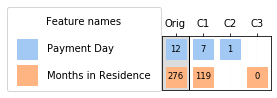

In [522]:
pltW = PlotCounterfactuals(overview_clean.iloc[:,:], individual)
pltW.show(None, bbox_to_anchor=(-0.01, -0.01))

In [ ]:
'''
## Implementation

# percentile
def _percentile(X):
    columns = X.columns
    grid = {}
    
    perc_start = 0.0
    perc_step_size = 10.0
    perc_finish = 100.00
    
    for c in columns:
        perc_steps = np.arange(perc_start, perc_finish+perc_step_size, step=perc_step_size)
        grid[c] = np.unique([np.percentile(X[c], perc_step) for perc_step in perc_steps])
    
    return grid

Grid = _percentile(df_grid)
print(Grid)
grid = []

for a in Grid:
    grid.append(a)
    
print(Grid[grid[0]])

import numpy as np

enumerated_grid = np.array([[a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r] 
         for a in Grid[grid[0]] for b in Grid[grid[1]] for c in Grid[grid[2]] for d in Grid[grid[3]]
         for e in Grid[grid[4]] for f in Grid[grid[5]] for g in Grid[grid[6]] for h in Grid[grid[7]]
         for i in Grid[grid[8]] for j in Grid[grid[9]] for k in Grid[grid[10]] for l in Grid[grid[11]] 
         for m in Grid[grid[12]] for n in Grid[grid[13]] for o in Grid[grid[14]] for p in Grid[grid[15]]
         for q in Grid[grid[16]] for r in Grid[grid[17]]])

pivot = np.array(X_test[39995]) # pivot

print(pivot)

v = np.empty(shape=2)*np.nan

print(v)

tentativas = [v]
solucoes = [] # solutions that will be find 

print(tentativas)

while tentativas!=[]: # while tentatives is null, continue
  
    curr = tentativas.pop() 
    pred_curr = curr.copy()
  
    #  Looking if it is valid
    pred_curr[np.isnan(curr)] = pivot[np.isnan(curr)] # verify if there is a decision to make or not

    if(clf_rt.predict([pred_curr])[0]==0): # if pivot was approved 
    
        solucoes= solucoes + [pred_curr]
        continue
    
    bound = False

    for sol in solucoes:
        if np.linalg.norm(pred_curr-pivot)>np.linalg.norm(sol-pivot): # if my current position is more distanct from my last one
            bound=True
            break
        
    if bound:
        continue

    try:
        idx = np.where(np.isnan(curr))[0][0]
    
    except:
        continue
    
    for value in grid[idx]:
        new_curr = curr.copy()
        new_curr[idx] = value
        tentativas+=[new_curr]
        
print(solucoes)

'''